In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [3]:
size_mapping = {'XL':3, 'L':2, 'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [4]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
inv_size_mapping

{3: 'XL', 2: 'L', 1: 'M'}

In [5]:
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [6]:
import numpy as np

In [7]:
class_mapping  = {label:idx  for idx , label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [8]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label','Alcohol', 'Malic acid', 'Ash', 'Alcaloinity of Ash', 'Magnesium', 'Total phenols', 
                   'Flavanoids', 'Nonflavanoids phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']
print('class labels: ', np.unique(df_wine['Class label']))
df_wine.head()

class labels:  [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcaloinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [10]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [11]:
X_test_std = stdsc.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=10)
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))


Training accuracy:  1.0
Test accuracy:  1.0


In [29]:
lr.intercept_

array([-2.57798564, -3.40698106, -4.97765516])

In [30]:
lr.coef_

array([[ 2.79840064,  1.01884247,  2.06397087, -3.15855245,  0.35214103,
         0.        ,  1.72179176,  0.        ,  0.        ,  0.        ,
         0.        ,  2.21360918,  3.90589178],
       [-2.69464418, -1.10126352, -2.84486877,  1.43870274,  0.        ,
         0.        ,  1.88780369,  0.97445179,  0.        , -6.09146838,
         2.37495244,  0.        , -5.36800894],
       [ 2.01587947,  0.01359324,  1.33602784,  0.        ,  0.        ,
         0.        , -5.09915779, -0.58159742,  0.        ,  3.06734146,
        -2.05056086, -1.33916075,  0.        ]])

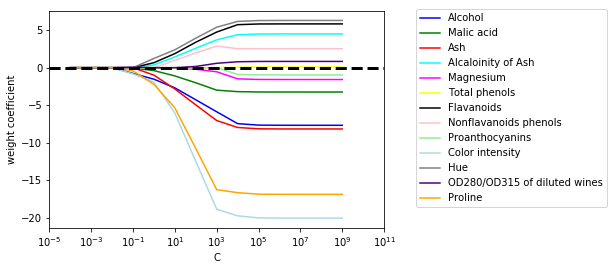

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
        'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 10):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1],
            color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**11])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

In [43]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__ (self, estimator, k_features, scoring=accuracy_score,
                    test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
        random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores, subsets = [], []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append((scores[best]))

        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train, y_train)

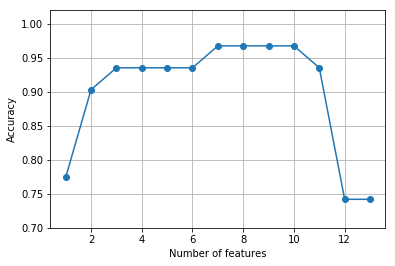

In [61]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()

In [59]:
k3 = list(sbs.subsets_[6])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Ash', 'Alcaloinity of Ash', 'Total phenols', 'Flavanoids',
       'Color intensity', 'OD280/OD315 of diluted wines'],
      dtype='object')


In [62]:
import SBS

In [63]:
knn.fit(X_train, y_train)
print('Traininig accuracy', knn.score(X_train, y_train))
print('test accuracy', knn.score(X_test, y_test))


Traininig accuracy 0.8145161290322581
test accuracy 0.7222222222222222


In [64]:
knn.fit(X_train_std[:, k3], y_train)
print('Traininig accuracy', knn.score(X_train_std[:, k3], y_train))
print('test accuracy', knn.score(X_test_std[:, k3], y_test))


Traininig accuracy 0.9596774193548387
test accuracy 1.0


In [67]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print('%2d) % -*s %f' % ( f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcaloinity of Ash             0.022366
12) Nonflavanoids phenols          0.013354
13) Ash                            0.013279


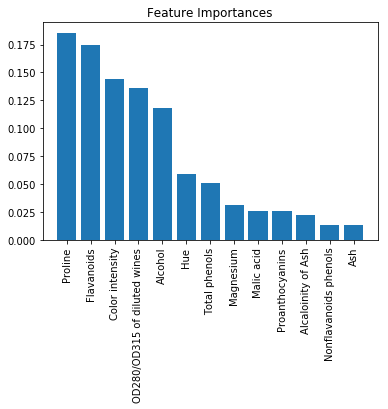

In [69]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [72]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion: ', X_selected.shape[0])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

Number of samples that meet this criterion:  124
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
